## Submit job

In [52]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from pathlib import Path

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path="program/check_waveform.py",
    device_id="urchin-pulse",
    name="check_waveform",
)
print(f"job_id = {job.job_id}")
job.wait_for_completion()
print(f"job_status = {job.status}")
print(f"elapsed_time={job.execution_time}")

job id = 068d43c0-bf35-7017-8000-2912b8176b35
job status = succeeded
elapsed time=12.822


## Download job result

In [53]:
Path("download").mkdir(exist_ok=True)
backend.download_log(
    job_id=job.job_id,
    save_dir="download",
)


'download/sselog_068d43c0-bf35-7017-8000-2912b8176b35.zip'

## Extract zip file

In [54]:
import zipfile
zip_path = Path(f"download/sselog_{job.job_id}.zip")
extract_dir = Path("extracted")

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
log_path = extract_dir / "ssecontainer.log"
new_log_path = extract_dir / f"sselog_{job.job_id}.log"

# rename
if log_path.exists():
    log_path.rename(new_log_path)

print("extracted file:", list(extract_dir.rglob("*")))

with new_log_path.open(encoding="utf-8") as f:
    for i, line in enumerate(f, start=1):
        print(f"{i}: {line.strip()}")

extracted file: [PosixPath('extracted/sselog_068d43a1-8db5-7ed2-8000-a70b43690f76.log'), PosixPath('extracted/sselog_068d4398-51f5-79c9-8000-eca7e8f7b08e.log'), PosixPath('extracted/ssecontainer_068d438e-ab45-7d8b-8000-49abd316f766.log'), PosixPath('extracted/sselog_068d43c0-bf35-7017-8000-2912b8176b35.log')]
1: Python 3.11.9 (main, Sep  4 2024, 23:15:21) [GCC 12.2.0] on linux
2: Type "help", "copyright", "credits" or "license" for more information.
3: >>> start program
4: Failed to load the skew file: 'NoneType' object is not subscriptable
5: ========================================
6: date: 2025-09-24 18:44:36
7: python: 3.11.9
8: qubex: 1.4.1b1+6937eef
9: env: /app/.venv
10: config: /home/shared/qubex-config/144Qv2/config
11: params: /home/shared/qubex-config/144Qv2/params
12: chip: 144Qv2 (3rdlotNo6Chip0.0)
13: qubits: ['Q024', 'Q025', 'Q026', 'Q027']
14: muxes: ['MUX06']
15: boxes: ['S173R']
16: ========================================
17: Successfully connected.
18: payload={'mod

## Extract payload

In [55]:
from pathlib import Path
import ast

payloads = []
with new_log_path.open(encoding="utf-8") as f:
    for line in f:
        if "payload=" in line:
            rhs = line.split("payload=", 1)[1].strip()
            try:
                data = ast.literal_eval(rhs)
                payloads.append(data)
            except Exception as e:
                print("parse error:", e)

print(payloads)


[{'mode': 'avg', 'data': {'Q024': {'raw': {'I': [-1.4859720977256075e-05, -6.127075721451547e-06, 6.484382538474165e-06, 2.1449053747346625e-05, 3.398479020688683e-05, -3.035997224287712e-06, 8.506228914484382e-05, 0.00023857854830566794, 0.00031488080276176333, 0.0003288883890490979, 0.0002723593497648835, 0.0002851216122508049, 0.0002242757473140955, 8.778156916378066e-05, 6.599922198802233e-05, 4.072110095876269e-05, 1.299006453336915e-05, 2.359141581109725e-05, -8.79774506756803e-06, -3.321939948364161e-05, 1.7593527445569634e-05, 6.524505442939699e-05, 9.941928874468431e-05, 7.666735473321751e-05, 9.280999802285805e-05, 7.288622873602435e-05, -8.247086952906102e-06, -1.0647814633557573e-05, -1.2076633538526949e-05, 2.4041117285378277e-05, 4.3857689888682216e-05, -2.182657044613734e-05, -1.5689614656366757e-06, 4.046412868774496e-05, 0.00011640410957625136, 0.00011522063869051635, -3.14314202114474e-05, -3.35153381456621e-05, 7.352485408773646e-05, 0.0001373408013023436, 8.60364889

## Plot IQ data

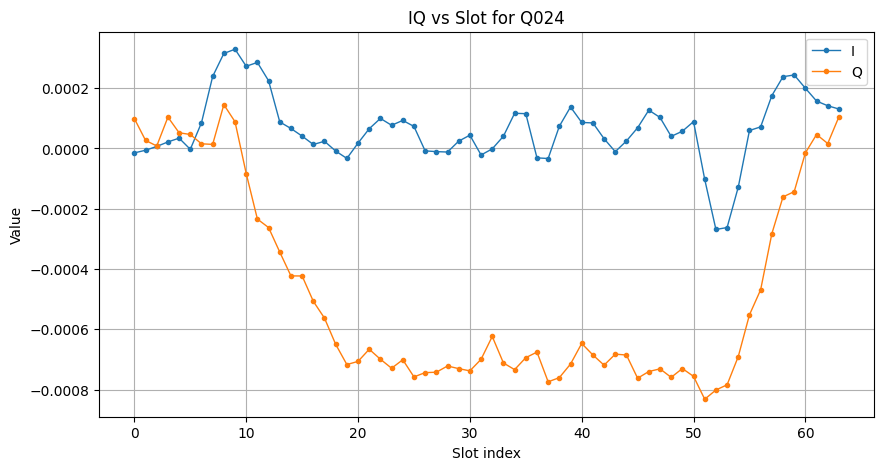

In [56]:
import matplotlib.pyplot as plt
p = payloads[0]

raw = p["data"]["Q024"]["raw"]
i = raw["I"]
q = raw["Q"]

slots = list(range(len(i)))

plt.figure(figsize=(10, 5))
plt.plot(slots, i, label="I", marker="o", markersize=3, linewidth=1)
plt.plot(slots, q, label="Q", marker="o", markersize=3, linewidth=1)
plt.xlabel("Slot index")
plt.ylabel("Value")
plt.title("IQ vs Slot for Q024")
plt.legend()
plt.grid(True)
plt.show()